# Variable Type Evaluation

Idea is making a dataset with 15 features and consider 5 of them as numeric and 5 as categorical and 5 as boolean features. We perform different ways to make these categorical and boolean variables such as:

1) Defining different thresholds with different ranges

2) Making a random list and multiplying it with the corresponding feature.

3) Check if the values are less or greater than zero.

Here we want to solve a classification problem, and we use different classification algorithms to see how these different types of features affect the performance of the model.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# going to the repository of this note book
%cd drive/My Drive/DIQ
!ls

#Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import pickle
from A_data_collection import make_dataset_for_classification, make_dataset_for_regression, make_dataset_for_clustering
from D_data_analysis import classification, clustering, regression,encoding_categorical_variables
from E_plot_results import plot
from sklearn.datasets import make_regression, make_classification, make_blobs
from sklearn.preprocessing import LabelEncoder


Idea is to making a dataset with 15 features and consider 5 of them as numeric and 5 as a categorical and 5 as a boolean features. We perform different ways to make these categorical and boolean variables such as:

1) Defining different thresholds with diferent ranges

2) Making an random list and multiplying it with the corresponding feature.

3) Check if the values are less or greater than zero.

Here we want to solve a

In [ ]:
"""
it will create data set with 15 features and 1000 samples. 5 of them are numeric, 5 are categorical and 5 are boolean.
it will be used for testing the effect of different types of features on the performance of the model.
"""

X, y = make_dataset_for_classification(n_samples=1000, n_features=15, n_informative=5, n_redundant=0,
                                       n_repeated=0,
                                       n_classes=2,
                                       n_clusters_per_class=2, weights=None, flip_y=0.01, class_sep=1.0,
                                       scale=2,
                                       hypercube=True, seed=2023)

In [ ]:
pd.DataFrame(X).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.071087,0.006037,-0.042424,-0.226127,-0.022423,-0.010448,-0.039186,-0.003937,-1.117695,-0.017586,-0.825849,0.024780,-0.035363,0.027990,1.106274
std,2.018327,1.947610,2.018480,3.800956,3.122238,2.007009,1.975548,2.046075,2.837436,2.048499,3.290502,2.023966,2.056228,2.020937,3.264754
min,-7.756907,-6.673921,-6.395772,-12.539526,-9.212033,-6.566232,-7.405301,-6.416585,-8.972575,-5.952066,-9.095387,-8.103831,-5.987773,-6.560090,-10.355086
25%,-1.276330,-1.274301,-1.451325,-2.821490,-2.314307,-1.248282,-1.332168,-1.450505,-3.029575,-1.341486,-2.985284,-1.317881,-1.434296,-1.367690,-1.037288
50%,0.054990,-0.012481,0.024946,0.155356,0.332614,0.019032,0.024802,0.022120,-1.376553,-0.045470,-1.005527,0.000310,-0.040681,0.025130,1.310173
75%,1.393092,1.282662,1.296323,2.573921,2.269123,1.419154,1.330189,1.360723,0.686619,1.401846,1.417480,1.395714,1.397076,1.347074,3.231820
max,7.625196,6.824354,5.258609,10.652623,8.322083,6.892257,6.273003,6.558913,7.069745,6.710572,9.500800,5.499765,7.128648,6.621724,10.583015


In [ ]:
"""
Here we can see the percentage of each class in the dataset.
"""
label_percentages = {label: len(y[y == label]) / len(y) * 100 for label in np.unique(y)}
print('The percentage of each classes are as following:')
label_percentages

##Testing the generated data to finding the right parameters for data generation:

In [ ]:
results_1_analysis = classification(X, y, 'DecisionTree', 2023)
results_1_analysis

Training for DecisionTree...


{'mean_perf': 0.8486861333512429,
 'distance': 0.1482999216800578,
 'speed': 0.22794604301452637}

#Evaluation:

## External functions:

In [ ]:
def randomly_feature_selection(data):
    """
    This function randomly selects 5 numeric features, 5 categorical features and 5 boolean features.
    it also categorize the categorical features and encode them. it will handle the encoding by calling the encoding_categorical_variables function.
    :param data:
    :return:
    """

    # Get the number of columns in the input array
    data = categorize(np.array(data))
    num_columns = data.shape[1]

    num_selected_columns = np.random.randint(5, 16)

    # Randomly select column indices
    selected_columns = np.random.choice(num_columns, size=num_selected_columns, replace=False)
    selected_columns = sorted(selected_columns)

    categorical_features = [1, 4, 5, 8, 12]
    boolean_features_index = [2, 6, 9, 10, 13]
    common_elements_bool = [f'{col}' for col in selected_columns if col in boolean_features_index]

    for col_index in selected_columns:
        if col_index in categorical_features:
            print(f"Column {col_index}: Categorical feature")
        elif col_index in boolean_features_index:
            print(f"Column {col_index}: Boolean feature")
        else:
            print(f"Column {col_index}: Numeric feature")

    result_array = data[selected_columns]
    result_array.columns = result_array.columns.astype(str)
    result_array = encoding_categorical_variables(result_array)
    result_array = boolean_features(result_array, common_elements_bool)
    return result_array


In [ ]:
def categorize(data):
    """
    This function categorize the categorical features. it will convert numeric features to categorical features.
    :param data:
    :return:
    """
    # Define the number of categories for each column
    num_categories_col1 = 10
    num_categories_col4 = 5
    num_categories_col12 = 10

    # Categorize column 1 with alphabetic categories
    min_col1, max_col1 = np.min(data[:, 1]), np.max(data[:, 1])
    bins_col1 = np.linspace(min_col1, max_col1, num_categories_col1 + 1)
    categories_col1 = np.digitize(data[:, 1], bins_col1, right=True)
    categories_col1 = np.array([chr(ord('A') + cat - 1) for cat in categories_col1])

    # Categorize column 4 with alphabetic categories
    min_col4, max_col4 = np.min(data[:, 4]), np.max(data[:, 4])
    bins_col4 = np.linspace(min_col4, max_col4, num_categories_col4 + 1)
    categories_col4 = np.digitize(data[:, 4], bins_col4, right=True)
    categories_col4 = np.array([chr(ord('A') + cat - 1) for cat in categories_col4])

    # Categorize column 5
    categories_col5 = np.random.choice(['A', 'B', 'C', 'D', 'E'], size=len(data))

    # Categorize column 8
    categories_col8 = np.random.choice(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'], size=len(data))

    # Find min and max of the 12th column
    min_col12, max_col12 = np.min(data[:, 12]), np.max(data[:, 12])
    bins_col12 = np.linspace(min_col12, max_col12, num_categories_col12 + 1)

    random_indices = np.random.choice(len(data), size=len(data) // 2, replace=False)
    categories_col12 = np.digitize(data[random_indices, 12], bins_col12, right=True)
    categories_col12 = np.array([chr(ord('A') + cat - 1) for cat in categories_col12])

    remaining_indices = np.setdiff1d(np.arange(len(data)), random_indices)
    categories_col12_random = np.random.choice(categories_col12, size=len(remaining_indices))

    categories_col12_combined = np.empty(len(data), dtype='U1')
    categories_col12_combined[random_indices] = categories_col12
    categories_col12_combined[remaining_indices] = categories_col12_random

    df = pd.DataFrame(data)

    # Replace specific columns with new string values
    df[[1, 4, 5, 8, 12]] = pd.DataFrame(
        {'col1': categories_col1, 'col4': categories_col4, 'col5': categories_col5,
         'col8': categories_col8, 'col12': categories_col12_combined}
    )
    return df

In [ ]:
def boolean_features(data, selected_columns):
    """
    The boolean_features function takes two parameters, data and selected_columns, and returns a modified DataFrame.
    Within the function, specific columns from the data are selected based on the values in selected_columns. For each selected column, different transformations are applied.
	•	If the selected column is '2', a threshold of 0 is set, converting the values to either 0 or 1.
	•	If the selected column is '6', a threshold of 1 is set, converting the values to either 0 or 1.
	•	If the selected column is '9', a threshold of -1 is set, converting the values to either 0 or 1.
	•	If the selected column is '10' or '13', a random list of 0s and 1s with the same length as the data is created and assigned to the column.

    :param data:
    :param selected_columns:
    :return:
    """
    # Select columns 2, 6, 9, 10, 13
    #selected_columns = [2, 6, 9, 10, 13]
    for col in selected_columns:
        if col == '2':
            # Set threshold on 0 for the 2nd column
            data[col] = (data[col] >= 0).astype(int)
        elif col == '6':
            # Set threshold on 1 for the 6th column
            data[col] = (data[col] >= 1).astype(int)
        elif col == '9':
            # Set threshold on -1 for the 9th column
            data[col] = (data[col] >= -1).astype(int)
        elif col == '10':
            # Define a random list of 0, 1 for the 10th column
            random_list = np.random.choice([0, 1], size=len(data))
            data[col] = random_list
        elif col == '13':
            # Define a random list of 0, 1 for the 13th column
            random_list = np.random.choice([0, 1], size=len(data))
            data[col] = random_list
    df = pd.DataFrame(data)

    return df


## Initial evaluation: Here we evaluate input data with 5 different scenarios:

1) Evaluation model with all numeric features

2) Evaluation model with 5 numeric features

3) Evaluate model with 10 numeric features and 5 categorical features

4) Evaluate model with 10 numeric features and 5 boolean features

5) Evaluate model with 5 numeric features, 5 boolean features and 5 categorical features

These kind of evaluations give an intuition to see how categorical and boolean features affect the model performance. The rest of the experiments will be done with random selection on different subset of features and will be compared.



In [ ]:
# 1) Evaluation model with all numeric features
data=X.copy()
results_1_analysis = classification(data, y, 'DecisionTree', 2023)
print(data.shape)
print(results_1_analysis)

#2) Evaluation model with 5 numeric features
data=X.copy()
data = data[:, [0,3,7,11,14]]
results_1_analysis = classification(data, y, 'DecisionTree', 2023)
print(data.shape)
print(results_1_analysis)

#3) Evaluate model with 10 numeric features and 5 categorical features
data=X.copy()
data=categorize(data)
data=encoding_categorical_variables(data)
data=np.array(data)
data = np.delete(data, [2, 6, 9, 10, 13], axis=1)
results_1_analysis = classification(data, y, 'DecisionTree', 2023)
print(data.shape)
print(results_1_analysis)

#4) Evaluate model with 10 numeric features and 5 boolean features
data=pd.DataFrame(X).copy()
column_mapping = {old_col: f'{i}' for i, old_col in enumerate(data.columns)}
data.rename(columns=column_mapping, inplace=True)
data=boolean_features(data,['2', '6', '9', '10', '13'])
data=np.array(data)
data = np.delete(data, [1,4,5,8,12], axis=1)
results_1_analysis = classification(data, y, 'DecisionTree', 2023)
print(data.shape)
print(results_1_analysis)
#5) Evaluate model with 5 numeric features, 5 boolean features and 5 categorical features.

data=X.copy()
data=categorize(data)
column_mapping = {old_col: f'{i}' for i, old_col in enumerate(data.columns)}
data.rename(columns=column_mapping, inplace=True)
data=encoding_categorical_variables(data)
data=boolean_features(data,['2', '6', '9', '10', '13'])
data=np.array(data)
results_1_analysis = classification(data, y, 'DecisionTree', 2023)
print(data.shape)
print(results_1_analysis)

'''

Training for DecisionTree...
(1000, 15)
{'mean_perf': 0.8390978936370013, 'distance': 0.1520872686108219, 'speed': 0.14674949645996094}
Training for DecisionTree...
(1000, 5)
{'mean_perf': 0.5715552837607782, 'distance': 0.4295971990742435, 'speed': 0.09008932113647461}
Training for DecisionTree...
(1000, 52)
{'mean_perf': 0.7119603418339412, 'distance': 0.2964014255091911, 'speed': 0.12595057487487793}
Training for DecisionTree...
(1000, 10)
{'mean_perf': 0.5666578216891485, 'distance': 0.41235583472768045, 'speed': 0.08401846885681152}
Training for DecisionTree...
(1000, 56)
{'mean_perf': 0.7391145068181246, 'distance': 0.27030793595369595, 'speed': 0.10530805587768555}


"\nencode = lambda data: LabelEncoder().fit_transform(data)\n\ndata=X.copy()\ndata=categorize(data)\ndata=np.array(data)\ndata[:,1]=encode(data[:,1])\ndata[:,4]=encode(data[:,4])\ndata[:,5]=encode(data[:,5])\ndata[:,8]=encode(data[:,8])\ndata[:,12]=encode(data[:,12])\ndata=boolean_features(data)\ndata=np.array(data)\nresults_1_analysis = classification(data, y, 'DecisionTree', 2023)\nprint(data.shape)\nprint(results_1_analysis)\n"

In [ ]:
CLASSIFICATION_ALGORITHMS = ["DecisionTree","LogisticRegression","KNN","RandomForest","AdaBoost","MLP"]
SEED = 2023


if __name__ == '__main__':

    print("Main ...")

    # A: DATA COLLECTION
    X, y = make_classification(n_samples=1000, n_features=15, n_informative=5, n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=2, weights=[0.5,0.5], flip_y=0.01, class_sep=1.0,scale=2, hypercube=True,random_state=2023)
    results_1_analysis={algo: {experimen_id: None for experimen_id in range(1,11)} for algo in CLASSIFICATION_ALGORITHMS}

    for algorithm in CLASSIFICATION_ALGORITHMS:
      for i in range(1,11):
        print(f'experiment {i} executing..................')
        data=X.copy()
        data_x=randomly_feature_selection(pd.DataFrame(data))
        data_y = y.ravel()
        results_1_analysis[algorithm][i]=classification(data_x, data_y, algorithm, SEED)


Main ...
experiment 1 executing..................
Column 0: Numeric feature
Column 2: Boolean feature
Column 3: Numeric feature
Column 4: Categorical feature
Column 5: Categorical feature
Column 6: Boolean feature
Column 7: Numeric feature
Column 8: Categorical feature
Column 11: Numeric feature
Column 12: Categorical feature
Column 14: Numeric feature
Training for DecisionTree...
experiment 2 executing..................
Column 0: Numeric feature
Column 1: Categorical feature
Column 2: Boolean feature
Column 3: Numeric feature
Column 5: Categorical feature
Column 7: Numeric feature
Column 9: Boolean feature
Column 10: Boolean feature
Column 11: Numeric feature
Column 12: Categorical feature
Column 13: Boolean feature
Column 14: Numeric feature
Training for DecisionTree...
experiment 3 executing..................
Column 0: Numeric feature
Column 1: Categorical feature
Column 2: Boolean feature
Column 3: Numeric feature
Column 4: Categorical feature
Column 5: Categorical feature
Column 6

#If you run the code again please save the results

In [ ]:
pickle_file_path = 'variable_type_evaluation.pkl'

# Save the list to a pickle file
with open(pickle_file_path, 'wb') as f:
    pickle.dump(results_1_analysis, f)

In [4]:
#load the pkl file
pickle_file_path = 'variable_type_evaluation.pkl'
with open(pickle_file_path, 'rb') as f:
    results_1_analysis = pickle.load(f)

In [8]:
results_1_analysis

{'DecisionTree': {1: {'mean_perf': 0.7499846325173282,
   'distance': 0.2480405346482359,
   'speed': 0.06792497634887695},
  2: {'mean_perf': 0.5691011664752925,
   'distance': 0.4194180606058045,
   'speed': 0.07495760917663574},
  3: {'mean_perf': 0.7661186737429841,
   'distance': 0.24706365961504817,
   'speed': 0.06867647171020508},
  4: {'mean_perf': 0.5611542535791965,
   'distance': 0.4130066262528667,
   'speed': 0.05798530578613281},
  5: {'mean_perf': 0.7457871240420093,
   'distance': 0.26351889858091093,
   'speed': 0.07262253761291504},
  6: {'mean_perf': 0.7491940917097162,
   'distance': 0.27006368083514654,
   'speed': 0.07010221481323242},
  7: {'mean_perf': 0.5485985655116876,
   'distance': 0.4466427191526958,
   'speed': 0.05540060997009277},
  8: {'mean_perf': 0.7659254248320686,
   'distance': 0.24519087317085292,
   'speed': 0.05929875373840332},
  9: {'mean_perf': 0.5641315607715471,
   'distance': 0.41972233766667777,
   'speed': 0.06496167182922363},
  10: {

# plot the results

In [9]:
CLASSIFICATION_ALGORITHMS = ["DecisionTree","LogisticRegression","KNN","RandomForest","AdaBoost","MLP"]
DecisionTree_1=[]
LogisticRegression_1=[]
KNN_1=[]
RandomForest_1=[]
AdaBoost_1=[]
MLP_1=[]


similarity=40
for i in range(1,11,1):
  DecisionTree_1.append(results_1_analysis['DecisionTree'][i])
  LogisticRegression_1.append(results_1_analysis['LogisticRegression'][i])
  KNN_1.append(results_1_analysis['KNN'][i])
  RandomForest_1.append(results_1_analysis['RandomForest'][i])
  AdaBoost_1.append(results_1_analysis['AdaBoost'][i])
  MLP_1.append(results_1_analysis['MLP'][i])

results_for_each_algorithm=[DecisionTree_1,LogisticRegression_1,KNN_1,RandomForest_1,AdaBoost_1,MLP_1]


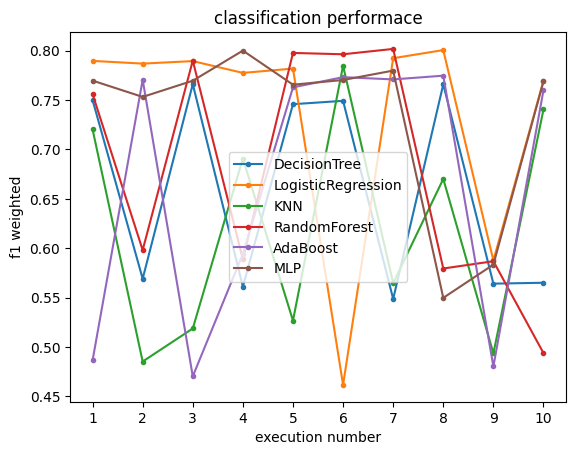

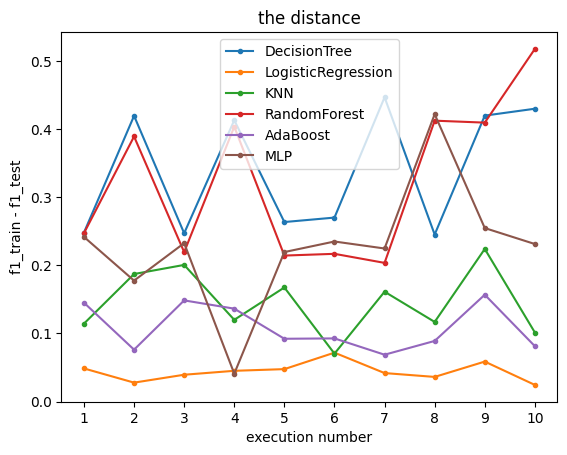

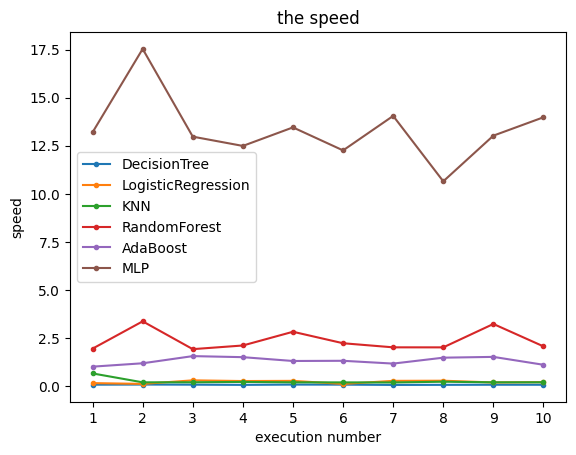

In [10]:

plot(x_axis_values=['1','2','3','4','5','6','7','8','9','10'], x_label="execution number", results=results_for_each_algorithm, title="classification performace", algorithms=CLASSIFICATION_ALGORITHMS, plot_type="performance")
plot(x_axis_values=['1','2','3','4','5','6','7','8','9','10'], x_label="execution number", results=results_for_each_algorithm,title="the distance", algorithms=CLASSIFICATION_ALGORITHMS, plot_type="distance train-test")
plot(x_axis_values=['1','2','3','4','5','6','7','8','9','10'], x_label="execution number", results=results_for_each_algorithm,title="the speed", algorithms=CLASSIFICATION_ALGORITHMS, plot_type="speed")
